In [1]:
from skimage import io

photo = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg/480px-Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg")
print("Shape is", photo.shape)
print("Size is", photo.size)

Shape is (480, 480, 3)
Size is 691200


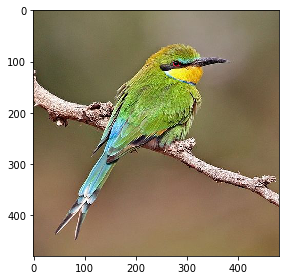

In [2]:
io.imshow(photo)

In [3]:
import numpy as np

photo = np.array(photo, dtype = np.float64) / 255
w, h, d = original_shape = tuple(photo.shape)
image_array = np.reshape(photo, (w * h, d))
image_array # RGB for each pixel

array([[0.41176471, 0.39215686, 0.2745098 ],
       [0.40784314, 0.38823529, 0.27058824],
       [0.40392157, 0.38431373, 0.26666667],
       ...,
       [0.5254902 , 0.41176471, 0.24705882],
       [0.5254902 , 0.41176471, 0.24705882],
       [0.52941176, 0.41568627, 0.25098039]])

In [4]:
from pandas import DataFrame

pixels = DataFrame(image_array, columns = ["red", "green", "blue"])
pixels.head()

,red,green,blue
0,0.411765,0.392157,0.274510
1,0.407843,0.388235,0.270588
2,0.403922,0.384314,0.266667
3,0.403922,0.384314,0.266667
4,0.396078,0.376471,0.258824


In [5]:
from matplotlib import colors

pixels["colour"] = [colors.to_hex(p) for p in image_array] # converting colors to hexadecimal
pixels

,red,green,blue,colour
0,0.411765,0.392157,0.274510,#696446
1,0.407843,0.388235,0.270588,#686345
2,0.403922,0.384314,0.266667,#676244
3,0.403922,0.384314,0.266667,#676244
4,0.396078,0.376471,0.258824,#656042
...,...,...,...,...
230395,0.529412,0.415686,0.250980,#876a40
230396,0.525490,0.411765,0.247059,#86693f
230397,0.525490,0.411765,0.247059,#86693f
230398,0.525490,0.411765,0.247059,#86693f


In [6]:
pixels_sample = pixels.sample(frac = 0.05) # taking only 5% of pixels

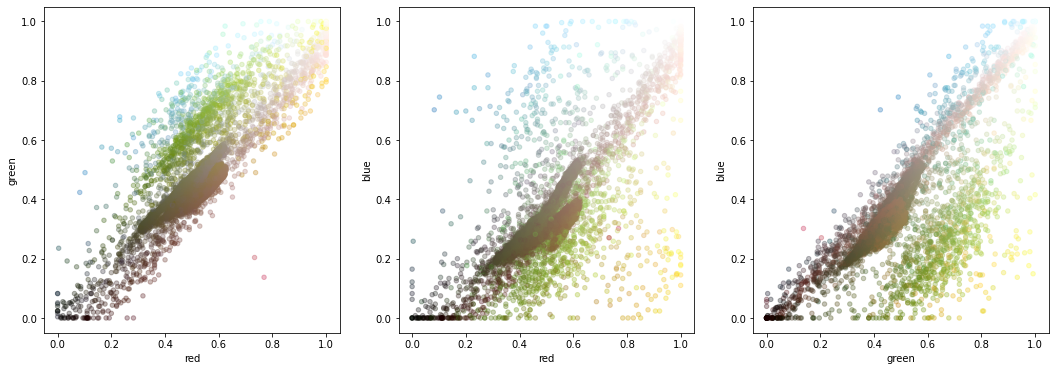

In [7]:
import matplotlib.pyplot as plt


def plot_colours(df, c1, c2, c3):
    """
    Given a DataFrame and three column names,
    plot the pairs against each other
    """
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    df.plot.scatter(c1, c2, c=df["colour"], alpha=0.3, ax=ax[0])
    df.plot.scatter(c1, c3, c=df["colour"], alpha=0.3, ax=ax[1])
    df.plot.scatter(c2, c3, c=df["colour"], alpha=0.3, ax=ax[2])


plot_colours(pixels_sample, "red", "green", "blue")

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 200).fit(pixels_sample[["red", "green", "blue"]])

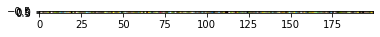

In [19]:
plt.imshow([kmeans.cluster_centers_])

In [20]:
labels = kmeans.predict(pixels[["red", "green", "blue"]])
labels

array([127, 127,  38, ...,  54,  54,  54])

In [21]:
reduced = np.array([kmeans.cluster_centers_[p] for p in labels]).reshape(original_shape)

Text(0.5, 1.0, 'RGB clustered')

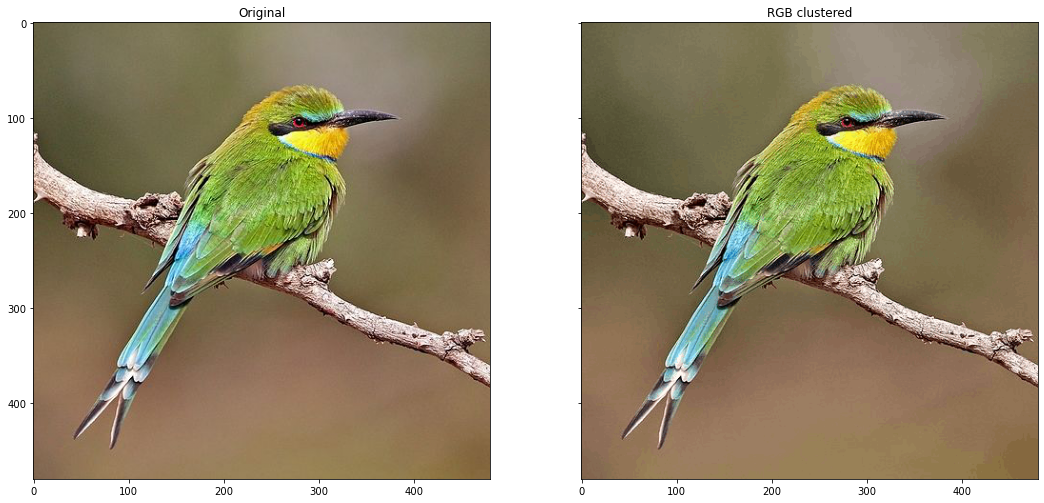

In [22]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")